# SIGNAL PROCESSING TP1 - M2 AI
## To Do: zoom in images

- Benedictus Kent Rachmat
- Jacobo Ruiz Ocampo

---

## IMPORT

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift

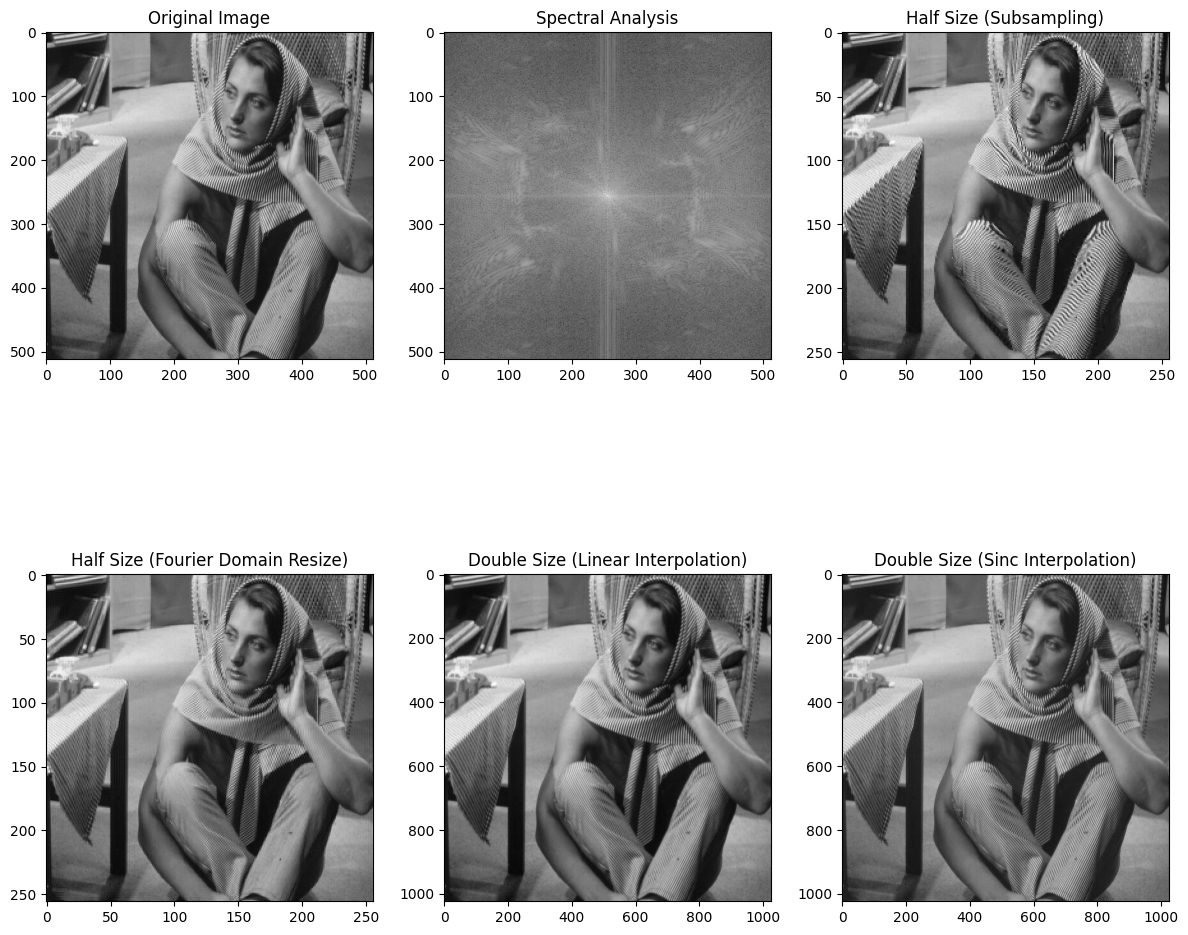

In [13]:
# Load the image in grayscale
image = cv2.imread('barbara.jpeg', cv2.IMREAD_GRAYSCALE)
height, width = image.shape

# Perform FFT on the original image
image_fft = np.fft.fft2(image)
image_fft_spectrum = np.fft.fftshift(image_fft)

# Resize the image to half size using subsampling
small_image_space = image[::2, ::2]

# Resize the image to double size using linear interpolation in the space domain
double_image_space = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)


# Resize to Half by Fourier
new_rows = image.shape[0] // 2
new_cols = image.shape[1] // 2
start_row = image.shape[0] // 4
start_col = image.shape[1] // 4

cropped_fshift = image_fft_spectrum[start_row:start_row+new_rows, start_col:start_col+new_cols]
cropped_f = np.fft.ifftshift(cropped_fshift)
half_image_fourier_resized = np.abs(np.fft.ifft2(cropped_f))


# Zero pad the Fourier spectrum to double its size in each dimension

pad_rows = image.shape[0] * 2
pad_cols = image.shape[1] * 2

padded_fshift = np.zeros((pad_rows, pad_cols), dtype=complex)
start_row = (pad_rows - image.shape[0]) // 2
start_col = (pad_cols - image.shape[1]) // 2
padded_fshift[start_row:start_row+image.shape[0], start_col:start_col+image.shape[1]] = image_fft_spectrum

padded_f = np.fft.ifftshift(padded_fshift)

double_image_sinc = np.abs(np.fft.ifft2(padded_f))

magnitude_spectrum = np.log(np.abs(image_fft_spectrum) + 1)


# Display the results
plt.figure(figsize=(12, 12))
plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Spectral Analysis')
plt.subplot(233), plt.imshow(small_image_space, cmap='gray'), plt.title('Half Size (Subsampling)')
plt.subplot(234), plt.imshow(half_image_fourier_resized, cmap='gray'), plt.title('Half Size (Fourier Domain Resize)')
plt.subplot(235), plt.imshow(double_image_space, cmap='gray'), plt.title('Double Size (Linear Interpolation)')
plt.subplot(236), plt.imshow(double_image_sinc, cmap='gray'), plt.title('Double Size (Sinc Interpolation)')

plt.tight_layout()
plt.show()

For a given image:

Perform a spectral analysis

Resize the image to get a smaller image of half size
- in the space domain by subsampling
- by resizing in the Fourier domain

    
Resize the image to get a bigger image of double size
- by sinc interpolation (zero padding in the Fourier domain)
- by linear interpolation in the space domain